# UNDERSTANDING TRANSFER FUNCTIONS

In [1]:
import numpy as np
import tellurium as te
import control
import matplotlib.pyplot as plt
import sympy

In [2]:
CONSTANT = 10
CONSTANT2 = 2
TIMES = np.linspace(0, 5, 50)
s, k, k2 = sympy.symbols("s, k, k2")

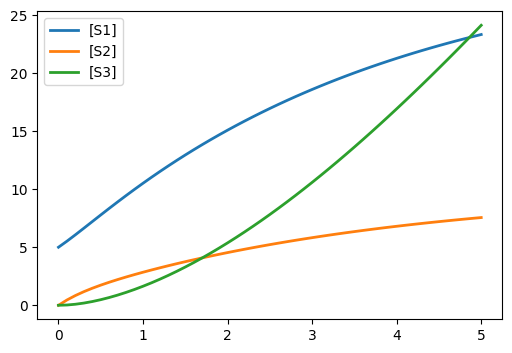

In [3]:
LINEAR2_MDL = """
J0:  -> S1; k
J1a: S2 -> S1; k2*S2
J1b: S1 -> S2; S1
J2: S2 -> S3; S2

k =10
k2 = 2
S1 = 5
S2 = 0
S3 = 0
"""
RR = te.loada(LINEAR2_MDL)
RR["k"] = CONSTANT
RR["k2"] = CONSTANT2
data = RR.simulate()
RR.plot()

\begin{eqnarray}
\dot{S}_1 & = & k - S_1 + k_2 S_2 \\
\dot{S}_2 & = & S_1 - (1 + k_2) S_2 \\
\dot{S}_3 & = & S_2 \\
\end{eqnarray}

\begin{eqnarray}
sS_1 (s) & = & k - S_1 (s) + k_2 S_2 (s) \\
s S_2 (s) & = & S_1 (s) - (1 + k_2)S_2 (s) \\
s S_3 (s) & = & S_2 (s) \\
\end{eqnarray}

\begin{eqnarray}
S_2(s) (s + 1 + k_2) & = & S_1 (s) \\
S_2 & = & \frac{S_1 (s)}{s + 1 + k_2} \\
\end{eqnarray}

\begin{eqnarray}
sS_1 (s) & = & k - S_1 (s) + k_2 \frac{S_1 (s)}{s + 1 + k_2} \\
S_1 ( s + 1 - \frac{k_2}{s + 1 + k_2} ) & = & k \\
S_1 ( \frac{(s + 1)(s + 1 + k_2) - k_2}{s + 1 + k_2} ) & = & k \\
\frac{S_1}{k} & = & \frac{s + 1 + k_2}  {(s + 1)(s + 1 + k_2) - k_2} \\
\frac{S_1}{k} & = & \frac{s + 1 + k_2}  {s^2 + (2 + k_2) s + 1} \\
\end{eqnarray}

In [4]:
sympy.expand((s + 1)*(s + 1 + k2) - k2)

k2*s + s**2 + 2*s + 1

In [5]:
tf = control.TransferFunction([1, 1+ CONSTANT2], [1, 2 + CONSTANT2, 1])
tf

TransferFunction(array([1, 3]), array([1, 4, 1]))

In [6]:
ss = control.tf2ss(tf)
ss

StateSpace(array([[-4., -1.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[1., 3.]]), array([[0.]]))

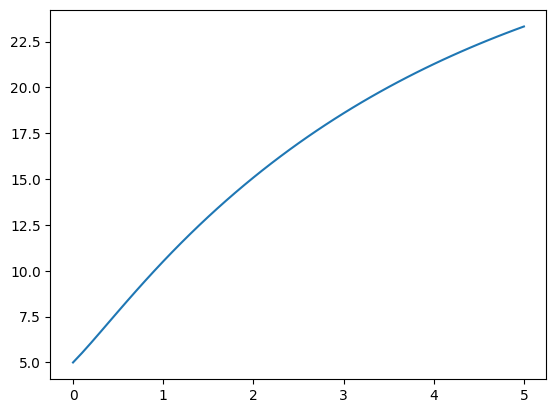

In [7]:
times = data["time"]
ss = control.tf2ss(tf)
X0 = np.array([0, 0])
X0 = np.reshape(X0, (2, 1))
#_, ys = control.step_response(ss, T=data["time"], X0=X0)
_, sys = control.step_response(tf, T=data["time"])
_, iys = control.impulse_response(tf, T=data["time"])
ys = sys*CONSTANT + 5*iys
plt.plot(times, ys)

Text(0, 0.5, 'tf')

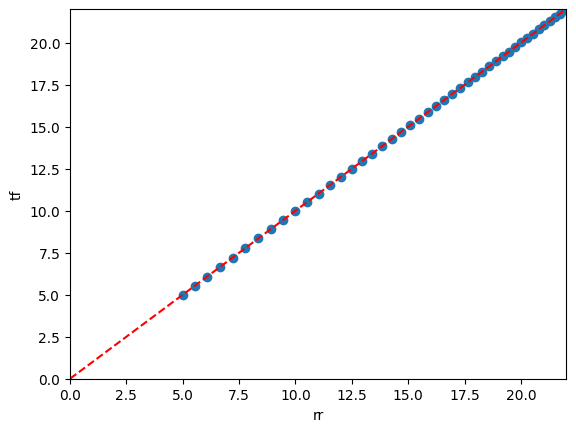

In [8]:
max_val = 22
plt.scatter(data["[S1]"], ys)
plt.xlim([0, max_val])
plt.ylim([0, max_val])
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")
plt.xlabel("rr")
plt.ylabel("tf")

In [9]:
tf = control.TransferFunction([CONSTANT], [1, CONSTANT])

In [10]:
U = np.array([[0, CONSTANT] for _ in range(len(TIMES))])

In [11]:
tf = control.TransferFunction([1, 2, CONSTANT], [1, 2, 3, CONSTANT])
tf

TransferFunction(array([ 1,  2, 10]), array([ 1,  2,  3, 10]))

In [12]:
ss = control.tf2ss(tf)
ss

StateSpace(array([[ -2.,  -3., -10.],
       [  1.,   0.,   0.],
       [  0.,   1.,   0.]]), array([[1.],
       [0.],
       [0.]]), array([[ 1.,  2., 10.]]), array([[0.]]))

# State Space Conversion for Transfer Functions

In [13]:
rr = te.loada(LINEAR2_MDL)
rr.getFullJacobian()

      S1, S2, S3
S1 [[ -1,  2,  0],
S2  [  1, -3,  0],
S3  [  0,  1,  0]]

In [43]:
from src.controlSBML import control_sbml as ctl
import control
from src.controlSBML.staircase import Staircase

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/con

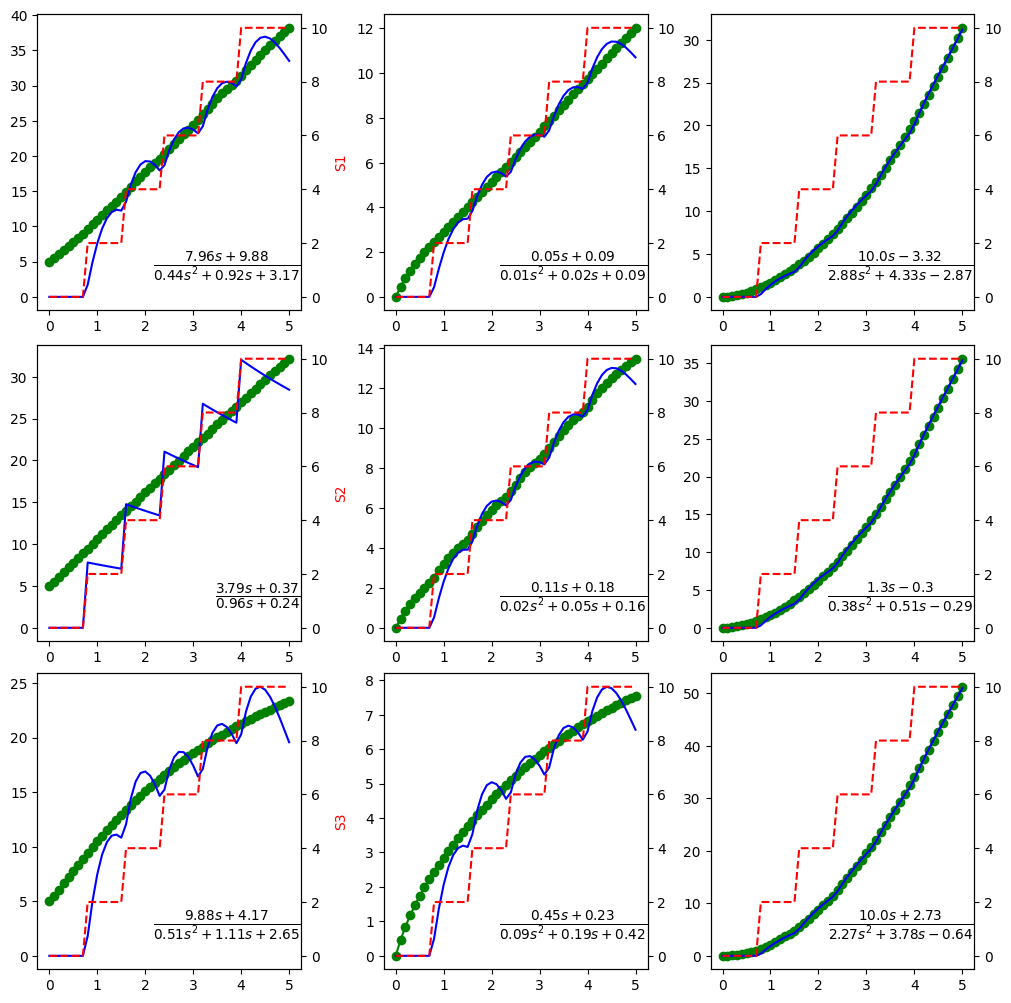

In [17]:
names = ["S1", "S2", "S3"]
ctlsb = ctl.ControlSBML(LINEAR2_MDL, input_names=names, output_names=names)
plot_result_df = ctlsb.plotFitMIMOTransferFunction()

In [21]:
fitter_result_df = ctlsb.fitMIMOTransferFunction()

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/controlSBML/src/controlSBML/msgs.py:13: UserWarning:



***Warning*** Could not find a steady state. Using current state.

/Users/jlheller/home/Technical/repos/con

In [29]:
A = np.reshape(np.array([f.transfer_function.dcgain() for f in fitter_result_df.values.flatten()]), (3, 3))
A

array([[ 3.11283601,  1.00803547,  1.15847029],
       [ 1.56750813,  1.14668459,  1.04779415],
       [ 1.57159336,  0.537352  , -4.24026341]])

In [30]:
B = np.eye(3)
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
C = np.eye(3)
C

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [33]:
D = np.reshape(np.repeat(0, 9), (3, 3))
D

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [34]:
ss_sys = control.StateSpace(A, B, C, D)

In [35]:
ss_sys

StateSpace(array([[ 3.11283601,  1.00803547,  1.15847029],
       [ 1.56750813,  1.14668459,  1.04779415],
       [ 1.57159336,  0.537352  , -4.24026341]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))

In [60]:
yv

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.20651944e-01, 4.56929512e-01, 9.84444426e-01, 1.79561278e+00,
        3.03057945e+00, 4.90057100e+00, 7.72312905e+00, 1.19750975e+01,
        1.83722014e+01, 2.79884962e+01, 4.24356165e+01, 6.41317396e+01,
        9.67051435e+01, 1.45599707e+02, 2.18983394e+02, 3.29111328e+02,
        4.94491577e+02, 7.42807302e+02, 1.11542695e+03, 1.67454801e+03,
        2.51349188e+03, 3.77227718e+03, 5.66098572e+03, 8.49482053e+03,
        1.27467062e+04, 1.91262098e+04, 2.86979511e+04, 4.30592651e+04,
        6.46067606e+04, 9.69362614e+04, 1.45442869e+05, 2.18221286e+05,
        3.27416760e+05, 4.91251691e+05, 7.37066430e+05, 1.10588202e+06,
        1.65924561e+06, 2.48950128e+06, 3.73520027e+06, 5.604222

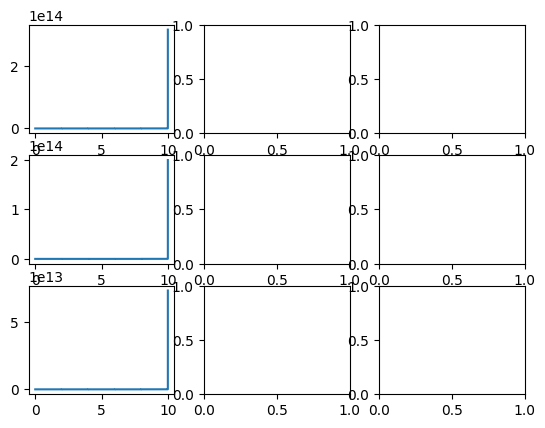

In [59]:
staircase = Staircase()
U = np.array([staircase.staircase_arr])
for _ in range(2):
    U = np.append(U, np.array([staircase.staircase_arr]))
U= np.reshape(U, (3, 100))
times, yv = control.forced_response(ss_sys, T=np.linspace(0, 10, len(staircase.staircase_arr)), U=U)
_, axes= plt.subplots(3,3)
for irow in range(3):
    for icol in range(1):
        axes[irow, icol].plot(staircase.staircase_arr, yv[irow,  :])

In [38]:
np.shape(yv)

(3, 3, 10)